## Task 3 : Prompt Engineering for Large Language Models (LLMs) [4 marks]
### Importing Libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
import os
from dotenv import load_dotenv
import random
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
from langchain_groq.chat_models import ChatGroq
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Loading Files

In [ ]:
# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#
#                                   ES335- Machine Learning- Assignment 1
#
# This file is used to create the dataset for the mini-project. The dataset is created by reading the data from
# the Combined folder. The data is then split into training, testing, and validation sets. This split is supposed
# to be used for all the modeling purposes.
#
# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Constants
time = 10
offset = 100
folders = ["LAYING", "SITTING", "STANDING", "WALKING", "WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS"]
classes = {"WALKING": 1, "WALKING_UPSTAIRS": 2, "WALKING_DOWNSTAIRS": 3, "SITTING": 4, "STANDING": 5, "LAYING": 6}

combined_dir = os.path.join("Combined")

# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# Train Dataset
# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_train = []
y_train = []
dataset_dir = os.path.join(combined_dir, "Train")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir, folder))

    for file in files:
        df = pd.read_csv(os.path.join(dataset_dir, folder, file), sep=",", header=0)
        df = df[offset:offset + time * 50]
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)

# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# Test Dataset
# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_test = []
y_test = []
dataset_dir = os.path.join(combined_dir, "Test")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir, folder))
    for file in files:
        df = pd.read_csv(os.path.join(dataset_dir, folder, file), sep=",", header=0)
        df = df[offset:offset + time * 50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# Final Dataset
# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# USE THE BELOW GIVEN DATA FOR TRAINING and TESTING purposes

# concatenate the training and testing data
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

# split the data into training and testing sets. Change the seed value to obtain different random splits.
seed = 4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed, stratify=y)

print("Training data shape: ", X_train.shape)
print("Testing data shape: ", X_test.shape)

# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)


### Creating DataFrames

In [ ]:
train_df = pd.DataFrame(np.concatenate((X_train.reshape((-1, 3)), np.repeat(y_train, 500).reshape(-1,1)), axis = 1), columns = ["accx", "accy", "accz", "Label"])
train_df["totalacc"] = train_df["accx"]**2 + train_df["accy"]**2 + train_df["accz"]**2
print("Training Dataframe shape:", train_df.shape)

test_df = pd.DataFrame(np.concatenate((X_test.reshape((-1, 3)), np.repeat(y_test, 500).reshape(-1,1)), axis = 1), columns = ["accx", "accy", "accz", "Label"])
test_df["totalacc"] = test_df["accx"]**2 + test_df["accy"]**2 + test_df["accz"]**2
print("Testing Datafrane shape:", test_df.shape)

# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Label wise distribution of the data
train_df_class_1 = train_df[train_df["Label"] == 1]
train_df_class_2 = train_df[train_df["Label"] == 2]
train_df_class_3 = train_df[train_df["Label"] == 3]
train_df_class_4 = train_df[train_df["Label"] == 4]
train_df_class_5 = train_df[train_df["Label"] == 5]
train_df_class_6 = train_df[train_df["Label"] == 6]

test_df_class_1 = test_df[test_df["Label"] == 1]
test_df_class_2 = test_df[test_df["Label"] == 2]
test_df_class_3 = test_df[test_df["Label"] == 3]
test_df_class_4 = test_df[test_df["Label"] == 4]
test_df_class_5 = test_df[test_df["Label"] == 5]
test_df_class_6 = test_df[test_df["Label"] == 6]

Training Dataframe shape: (63000, 5)
Testing Datafrane shape: (27000, 5)


### Loading Model and API key

> The `API Keys` are stored in a secret `.env` file which is not tracked by git.

In [ ]:
# Groq API and Models 
load_dotenv()
groq_api_key_akash = os.getenv("API_KEY_AKASH") #loading api keys from .env file 
groq_api_key_romit= os.getenv("API_KEY_ROMIT")

groq_models = {
    "llama3-70b": "llama3-70b-8192", 
    "mixtral": "mixtral-8x7b-32768", 
    "gemma-7b": "gemma-7b-it",
    "llama3.1-70b":"llama-3.1-70b-versatile",
    "llama3-8b":"llama3-8b-8192",
    "llama3.1-8b":"llama-3.1-8b-instant",
    "gemma-9b":"gemma2-9b-it"
}

modelName = "llama3.1-70b"

llm = ChatGroq(model=groq_models[modelName], api_key=groq_api_key_romit, temperature=0)

### 1. Demonstrate how to use Zero-Shot Learning and Few-Shot Learning to classify human activities based on the featurized accelerometer data. Qualitatively demonstrate the performance of Few-Shot Learning with Zero-Shot Learning. Which method performs better? Why? [1 marks]

For both `Zero Shot Learning` and `Few Shot Learning`, we'll be using the `test_df` from the original `UCI-HAR` dataset to get classification answers and tell accuracy.

>We'll pass data to the llm (for both training in case of Few-Shot and testing, in Windows of 5 seconds after averaging over non-overlapping 0.2 second windows)
- Zero Shot Learning

In [ ]:
total_window_width = 5 # in seconds
ind_window_width = 0.2 # in seconds
sampling_rate = 50 #in Hertz
num_of_windows = total_window_width / ind_window_width

# function to get test data timeseries from testing dataset
def get_avg_acc_data(start_seconds, activity_class):
    match activity_class:
        case 1:
            df = test_df_class_1
        case 2:
            df = test_df_class_2
        case 3:
            df = test_df_class_3
        case 4:
            df = test_df_class_4
        case 5:
            df = test_df_class_5
        case 6:
            df = test_df_class_6
    # Get the average data from the dataframe
    # print(df.head())
    five_sec_data = df[["accx", "accy", "accz"]][start_seconds * sampling_rate:(start_seconds + 5) * sampling_rate]
    avg_data = [np.mean(window, axis=0).to_list() for window in np.array_split(five_sec_data, num_of_windows)]

    #plotting the generated data
    # plt.plot(np.arange(start_seconds, start_seconds + total_window_width, ind_window_width), [data[0] for data in avg_data], label="x")
    # plt.plot(np.arange(start_seconds, start_seconds + total_window_width, ind_window_width), [data[1] for data in avg_data], label="y")
    # plt.plot(np.arange(start_seconds, start_seconds + total_window_width, ind_window_width), [data[2] for data in avg_data], label="z")
    # plt.legend()
    # plt.ylim(-1, 2)
    # plt.show()

    return avg_data

def build_query_zeroshot(string):
    return f"""
    * You are a Human Activity Recognition model. 
    * Your task is to classify the given acceleration data in terms of g (acceleration at earth's surface), which is data of a five second window after averaging over 0.5 second non-overlapping windows, resulting in 10 data points.
    * The data is recorded by accelerometer positioned above the torso of the person.
    * The data's format is as such that each line has acceleration in X, acceleration in Y, acceleration in Z respectively where X is the direction along the person's height, Y is along the person's breadth seen from front and Z is perpendicular to the person's body. 
    * Also note that the magnitude of the acceleration values take into account the earth's gravity, showing which axis is pointing towards the earth's center and not necessarily showing if the person is accelerating in that direction.
    * Pay particular attention to the variation in the data over the given window to differentiate between static and dynamic activities. Also pay attention to which axis has higher value, indicating the person's orientation
    1. Walking
    2. Walking Upstairs
    3. Walking Downstairs
    4. Sitting
    5. Standing
    6. Lying Down

    * Provide JUST the number corresponding to the predicted activity

    data: 
    {string}
    """ 

In [ ]:
m_iters = 5
iters = 20

def evaluate_llm_zeroshot(iters = 10):
    runs_results = []
    runs_results_staticdynamic = []
    for _ in range(iters):
        crct_class = random.randint(1, 6)
        start_time = random.randint(0, 5)
        data = get_avg_acc_data(start_time, crct_class)
        data_string = "\n".join([str(point) for point in data])
        query = build_query_zeroshot(data_string)
        
        answer = llm.invoke(query)

        # print(answer.content, crct_class)
        runs_results.append(1 if int(answer.content.split()[-1].lstrip("(").rstrip(").")) == crct_class else 0)
        runs_results_staticdynamic.append(1 if (int(answer.content.split()[-1].lstrip("(").rstrip(").")) in [1, 2, 3] and crct_class in [1, 2, 3]) or (int(answer.content.split()[-1].lstrip("(").rstrip(").")) in [4, 5, 6] and crct_class in [4, 5, 6]) else 0)
    
    return (np.round(np.mean(runs_results), 4), np.round(np.mean(runs_results_staticdynamic), 4))


print(list(classes.items()))
accuracies = []
accuracies_staticdynamic = []
for _ in range(m_iters):
    accuracy = evaluate_llm_zeroshot(iters=iters)
    accuracies.append(accuracy[0])
    accuracies_staticdynamic.append(accuracy[1])

print(f"Max Accuracy over {m_iters} runs of {iters} prompts each:", max(accuracies) * 100, "\nMean:", np.round(np.mean(accuracies) * 100, 2))
print("Max Accuracy for just differentiating between static and dynamic activities:", max(accuracies_staticdynamic) * 100, "\nMean:", np.round(np.mean(accuracies_staticdynamic) * 100, 2))


[('WALKING', 1), ('WALKING_UPSTAIRS', 2), ('WALKING_DOWNSTAIRS', 3), ('SITTING', 4), ('STANDING', 5), ('LAYING', 6)]
Max Accuracy over 5 runs of 20 prompts each: 30.0 
Mean: 20.0
Max Accuracy for just differentiating between static and dynamic activities: 80.0 
Mean: 69.0


_This testing was done using the model `llama3-70b`_

- Few Shot Learning

>We provide the example data (from `training dataset`) along with their correct labels for each class of activity to the model first, then we ask it to classify a timeseries data from the test set

In [ ]:
ACTIVITIES = {
    1: 'WALKING',
    2: 'WALKING_UPSTAIRS',
    3: 'WALKING_DOWNSTAIRS',
    4: 'SITTING',
    5: 'STANDING',
    6: 'LAYING',
}

# function to get example data timeseries for prompt - from training dataset
def get_avg_acc_train_data(start_seconds, activity_class):
    match activity_class:
        case 1:
            df = train_df_class_1
        case 2:
            df = train_df_class_2
        case 3:
            df = train_df_class_3
        case 4:
            df = train_df_class_4
        case 5:
            df = train_df_class_5
        case 6:
            df = train_df_class_6
    # Get the average data from the dataframe
    # print(df.head())
    five_sec_data = df[["accx", "accy", "accz"]][start_seconds * sampling_rate:(start_seconds + 5) * sampling_rate]
    avg_data = [np.mean(window, axis=0).to_list() for window in np.array_split(five_sec_data, num_of_windows)]

    return avg_data

def build_query_fewshot(train, test):
    return f"""
    * You are a Human Activity Recognition model. 
    * Your task is to classify the given acceleration data in terms of g (acceleration at earth's surface), which is data of a five second window after averaging over 0.5 second non-overlapping windows, resulting in 10 data points.
    * The data is recorded by accelerometer positioned above the torso of the person.
    * The data's format is as such that each line has a datapoint containing acceleration in X, acceleration in Y, acceleration in Z respectively where X is the direction along the person's height, Y is along the person's breadth seen from front and Z is perpendicular to the person's body. 
    * Also note that the magnitude of the acceleration values take into account the earth's gravity, showing which axis is pointing towards the earth's center and not necessarily showing if the person is accelerating in that direction. This can be helpful in determining the orientation of the person's body. 
    * Pay particular attention to the variation in the data over the given window to differentiate between static and dynamic activities. Also pay attention to which axis has higher value, indicating the person's orientation.

    1. Walking
    2. Walking Upstairs
    3. Walking Downstairs
    4. Sitting
    5. Standing
    6. Lying Down

    *Here are few examples:
    {train}

    * Provide just the number corresponding to the predicted activity

    data: 
    {test}
    """ 

In [ ]:
m_iters = 3
number_of_examples = 1  # change this to 3 and 6 respectively to get 3shot and 6shot data
def evaluate_llm_fewshot(iters = 10):
    runs_results = []
    runs_results_staticdynamic = []
    start_time = random.randint(0, 5)
    
    train_string = ""
    for i in range(number_of_examples):
        c = (i % 6) + 1
        train_string += str(i+1) + " Timeseries data:\n" + "\n".join([str(point) for point in get_avg_acc_train_data(start_time, c)]) + "\nActivity: " + str(c) + ": " + ACTIVITIES[c] + "\n\n"

    for _ in range(iters):
        crct_class = random.randint(1, 6)

        test_data = get_avg_acc_data(start_time, crct_class)
        test_string = "\n".join([str(point) for point in test_data])
        query = build_query_fewshot(train_string, test_string)
        # print(query)
        
        answer = llm.invoke(query)

        # print(answer.content, crct_class)
        runs_results.append(1 if int(answer.content.split()[-1].lstrip("(").rstrip(").")) == crct_class else 0)
        runs_results_staticdynamic.append(1 if (int(answer.content.split()[-1].lstrip("(").rstrip(").")) in [1, 2, 3] and crct_class in [1, 2, 3]) or (int(answer.content.split()[-1].lstrip("(").rstrip(").")) in [4, 5, 6] and crct_class in [4, 5, 6]) else 0)
    
    return (np.round(np.mean(runs_results), 4), np.round(np.mean(runs_results_staticdynamic), 4))


# print(list(classes.items()))
accuracies = []
accuracies_staticdynamic = []
for _ in range(m_iters):
    accuracy = evaluate_llm_fewshot(iters=iters)
    accuracies.append(accuracy[0])
    accuracies_staticdynamic.append(accuracy[1])

In [ ]:
print(f"Max Accuracy over {m_iters} runs of {iters} prompts each: ({number_of_examples} shots)", max(accuracies) * 100, "\nMean:", np.round(np.mean(accuracies) * 100, 2))
print("Max Accuracy for just differentiating between static and dynamic activities:", max(accuracies_staticdynamic) * 100, "\nMean:", np.round(np.mean(accuracies_staticdynamic) * 100, 2))

Max Accuracy over 3 runs of 20 prompts each: (1 shots) 40.0 
Mean: 25.0
Max Accuracy for just differentiating between static and dynamic activities: 100.0 
Mean: 95.0


> Max Accuracy over 3 runs of 20 prompts each: (1 shot) `40.0`   
> Mean: `25.0`  
> Max Accuracy for just differentiating between static and dynamic activities: 100.0  
> Mean: 95.0

> Max Accuracy over 3 runs of 20 prompts each: (3 shots) `55.0`  
> Mean: `45.0`  
> Max Accuracy for just differentiating between static and dynamic activities: 100.0  
> Mean: 100.0

> Max Accuracy over 3 runs of 20 prompts each: (6 shots)  `60.0`  
> Mean: `46.67`  
> Max Accuracy for just differentiating between static and dynamic activities: 90.0  
> Mean: 83.33

_This testing was done using the model `llama3.1-70b`_

#### Accuracy Comparison

| Learning Method | Max Accuracy | Mean Accuracy |
| --- | --- | --- |
| Zero-Shot Learning | 30% | 20% |
| Few-Shot Learning (1 shot) | 40% | 25% |
| Few-Shot Learning (3 shots) | 55% | 45% |
| Few-Shot Learning (6 shots) | 60% | 46.67% |

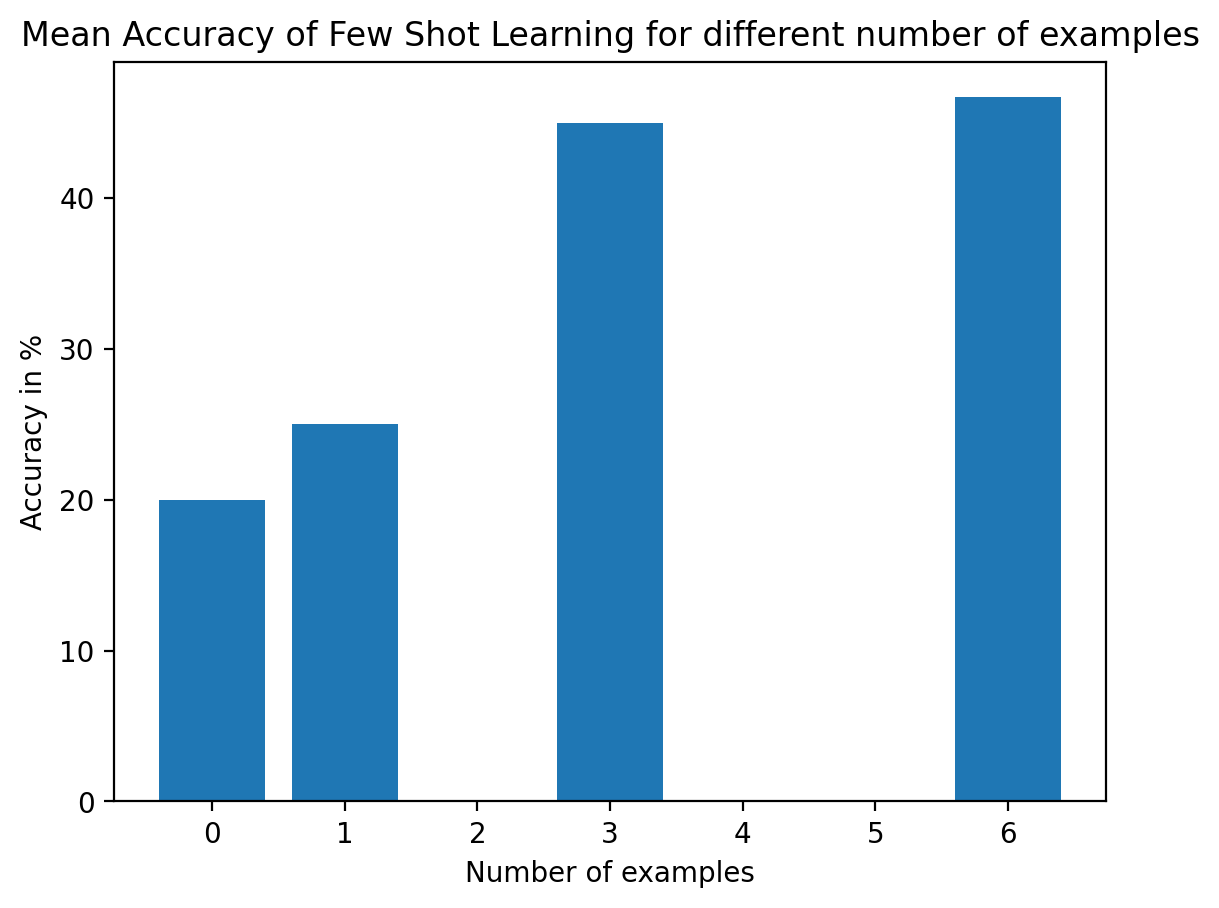

In [ ]:
plt.bar([0, 1, 3, 6], [20, 25, 45, 46.67])
plt.ylabel("Accuracy in %")
plt.xlabel("Number of examples")
plt.title("Mean Accuracy of Few Shot Learning for different number of examples")
plt.show()


#### As we can see, Few Shot Learning performs much better than zero shot learning.
The reasons behind this can be many, including:
- The lack of context behind the **nature, scale, variance and magnitude of the data** in zero shot learning; this problem is solved to a certain extent in few shot learning since the llm now knows what exactly is a large variance and what is a small variance by correlating with the activity.
- Since the llm now has example data for each activity in few shot learning, it can also **directly correalate the new test-data with the examples to give an answer**. Altough I doubt this is what happens inside the LLM.  

### 2. Quantitatively compare the accuracy of Few-Shot Learning with Decision Trees (You may use a subset of the test set if you encounter rate-limiting issues). Which method performs better? Why? [1 marks]